<center><font size="+4">Programming & Data Analytics & AI 2</font></center>
<center><font size="+2">2023/2024</font></center>
<center><font size="+2">Sant'Anna School of Advanced Studies, Pisa, Italy</font></center>
<center><img src="https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20232024/raw/main/PDAI/jupyter/jupyterNotebooks/images/SSSA_LEMbeDS.png" width="700" alt="L'EMbeDS"></center>

<center><font size="+2">Course responsible</font></center>
<center><font size="+2">Andrea Vandin a.vandin@santannapisa.it</font></center>

---

<center><font size="+4">Part 1</font></center>
<center><font size="+4">Exploratory Data Analysis on the Titanic dataset: examples of tasks to solve</font></center>

---
---

# Titanic dataset
The ship Titanic sank in 1912 with the loss of most of its passengers (and crew members - we refer to all as passegners)
- Details can be obtained on 1309 passengers on board the ship Titanic. 

For each passenger, we have
- __14 attributes__ 
- __1 target variable__ on the survival

In this project, we aim at
- analyzing this dataset in order to obtain
- a classifier able to predict the survival probability of a hypotethical passenger.

| Variable name   |     Variable label      |  Data type | Value labels |
|-|-|-|-|
|survived|  Died/Survived (Target) | Ordinal (Number)|  0="Died", 1="Survived" 
|pclass|	Class	| Ordinal (Number)|	1 = 1st, 2= 2nd, 3 = 3rd||
|Residence | Country of Residence	| Nominal (Number)	|  0="American", 1="British",2="Other" |
|name	|	Name |String||
|age	|	Age |Number||	
|sibsp|	Number of siblings/ spouses|	 Number ||
|parch|Number of parents/ children on board|	 Number ||	
|Ticket|	Ticket number|	String||
|fare|	Price of ticket| Number	||
|Cabin|	Cabin number|	String||
|Embarked|Where passenger embarked|	Nominal (String)||
|Boat|	Boat identification (if rescued)|	String||
|Body|	Body number (if died)|	String||
|Home.dest|	Home town|	String	||
|Gender|	Gender|	 Nominal (String)	|	"Male", "Female"|



Embarked is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):
- C = Cherbourg
- Q = Queenstown
- S = Southampton

An example of a 'bad analysis project'
- [Newspaper article: More Britons than Americans died on Titanic 'because they queued'](https://www.independent.co.uk/news/world/australasia/more-britons-than-americans-died-on-titanic-because-they-queued-1452299.html)

In [7]:
#%pip install --upgrade pip
#%pip install seaborn

In [8]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Another library for plotting: more advanced features than matplotlib
import seaborn as sns

In [9]:
#csv_path='https://github.com/EMbeDS-education/StatsAndComputing20222023/raw/main/datasets/TITANIC.csv'
csv_path='https://raw.githubusercontent.com/EMbeDS-education/ComputingDataAnalysisModeling20232024/main/datasets/TITANIC.csv'

In [10]:
titanic_data = pd.read_csv(csv_path)
titanic_data.head()

,pclass,survived,Residence,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Gender
0,3,0,0,"Abbing, Mr. Anthony",42,0,0,C.A. 5547,7.55,,S,,,,Male
1,3,0,0,"Abbott, Master. Eugene Joseph",13,0,2,C.A. 2673,20.25,,S,,,"East Providence, RI",Male
2,3,0,0,"Abbott, Mr. Rossmore Edward",16,1,1,C.A. 2673,20.25,,S,,190,"East Providence, RI",Male
3,3,1,0,"Abbott, Mrs. Stanton (Rosa Hunt)",35,1,1,C.A. 2673,20.25,,S,A,,"East Providence, RI",Female
4,3,1,2,"Abelseth, Miss. Karen Marie",16,0,0,348125,7.65,,S,16,,"Norway Los Angeles, CA",Female


In [11]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   Residence  1309 non-null   int64 
 3   name       1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
 14  Gender     1309 non-null   object
dtypes: int64(5), object(10)
memory usage: 153.5+ KB


# Hints on Exploratory Data Analysis
The task of Data Processing can be generally defined as 
- "the collection and manipulation of items of data to produce meaningful information" [wiki](https://en.wikipedia.org/wiki/Data_processing)

Examples of information interesting for an EDA on the Titanic dataset:
* Total number of entries and column types
* Check quality of data
  * Duplicate entries
  * Check for null values (and try to handle them)
* Check for (un)balancing of data
  * Check distribution of numeric data 
  * Check distribution of target variable
* More passenger-specific information
  * Who were the passengers on the Titanic? (i.e., Age, Gender, Class etc.)
  * Who was alone and who was with family?
  * What factors helped people surviving?

## Survival distribution for each gender

Here we only exemplify: distribution of the values of the target variable

In [12]:
titanic_data.survived.value_counts()

survived
0    809
1    500
Name: count, dtype: int64

From this we know that 
- 809 passengers died
- 500 passengers survived

Can we look at these numbers in greater detail?
- E.g., we could naturally group by either the `Gender` or `survived` attributes, or both
- We do this using `groupby` operations

A groupby operation involves some combination of 
* Splitting the data into groups based on some criteria.
  - Split survided and dead males and females
* Applying a function to each group independently.
  - How many Males and Females survived, how many died?
* Combining the results into a data structure.
  - Let's plot this information

We first focus on
- survived
- not survived

To compute the `mean`, we must consider only 'numeric data'

In [13]:
titanic_data_numeric=titanic_data[['pclass','Residence','sibsp','parch','survived']]
titanic_data_numeric

,pclass,Residence,sibsp,parch,survived
0,3,0,0,0,0
1,3,0,0,2,0
2,3,0,1,1,0
3,3,0,1,1,1
4,3,2,0,0,1
...,...,...,...,...,...
1304,3,2,1,0,0
1305,3,2,1,0,0
1306,3,2,0,0,0
1307,3,2,0,0,0


In [14]:
titanic_data_numeric.groupby(['survived']).mean()

,pclass,Residence,sibsp,parch
survived,,,,
0,2.500618,1.466007,0.521632,0.328801
1,1.962000,1.228000,0.462000,0.476000


Why do we get this weird data?
- Becuase, by default, `mean` is applied to all numeric columns (excluding `survived` on which we grouped)
  - actually, this is an old comment. In latest versions, pandas gives an error if mean is applied on non-numeric columns (e.g., with strings)
- Computing the mean of ordinal values is not particularly informative... More on this in Part 2

Let's compute some more interesting data.<br/>
We focus on 
  - male
    - survived
    - not survived
  - female
    - survived
    - not survived    

In [15]:
titanic_data.groupby(['Gender','survived']).size()

Gender  survived
Female  0           127
        1           339
Male    0           682
        1           161
dtype: int64

Let's plot this information using
- Matplotlib

<Axes: ylabel='Gender,survived'>

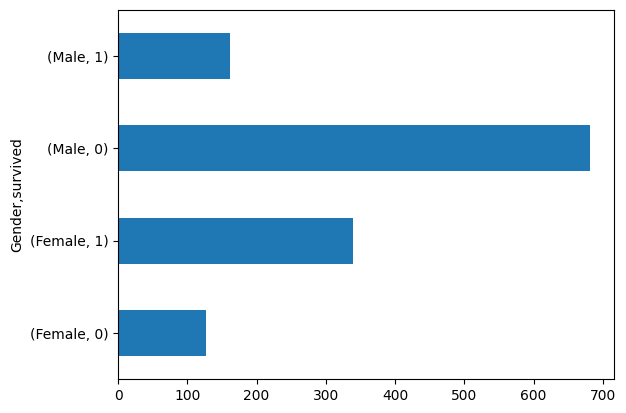

In [16]:
titanic_data.groupby(['Gender','survived']).size().plot(kind='barh')

Seaborn can compute this for us automatically

<Axes: xlabel='Gender', ylabel='count'>

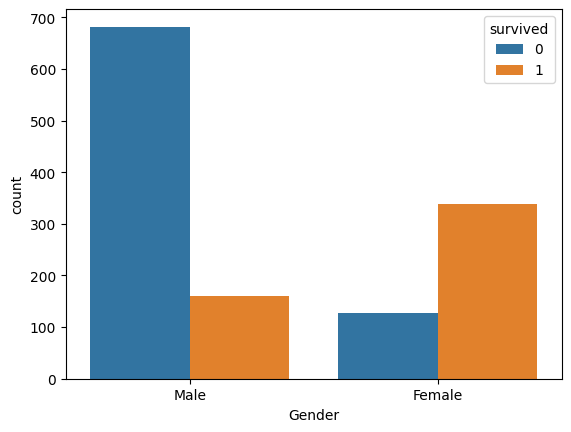

In [17]:
import seaborn as sns
sns.countplot(data=titanic_data, x='Gender',hue='survived')

## Missing values: pay attentiton to what you ask for!

Another exmaple is: How many NaN do we have?
- We saw in the `titanic_data.info()` above there are no NA

In [18]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   Residence  1309 non-null   int64 
 3   name       1309 non-null   object
 4   age        1309 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1309 non-null   object
 9   cabin      1309 non-null   object
 10  embarked   1309 non-null   object
 11  boat       1309 non-null   object
 12  body       1309 non-null   object
 13  home.dest  1309 non-null   object
 14  Gender     1309 non-null   object
dtypes: int64(5), object(10)
memory usage: 153.5+ KB


Are we sure about this!?

In [19]:
titanic_data.isna().sum()

pclass       0
survived     0
Residence    0
name         0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
Gender       0
dtype: int64

It really seems that we have no missing values.

Are we really really sure!?
- Take a look in the link below:
  - There are plenty of `' '`
  - Pandas failed to recognize them as NA.
  - How can we spot them? We make them NA!

In [20]:
csv_path

'https://raw.githubusercontent.com/EMbeDS-education/ComputingDataAnalysisModeling20232024/main/datasets/TITANIC.csv'

In [21]:
titanic_data_no_space=titanic_data.replace(' ',pd.NA)
titanic_data_no_space.head()

,pclass,survived,Residence,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Gender
0,3,0,0,"Abbing, Mr. Anthony",42,0,0,C.A. 5547,7.55,<NA>,S,<NA>,<NA>,<NA>,Male
1,3,0,0,"Abbott, Master. Eugene Joseph",13,0,2,C.A. 2673,20.25,<NA>,S,<NA>,<NA>,"East Providence, RI",Male
2,3,0,0,"Abbott, Mr. Rossmore Edward",16,1,1,C.A. 2673,20.25,<NA>,S,<NA>,190,"East Providence, RI",Male
3,3,1,0,"Abbott, Mrs. Stanton (Rosa Hunt)",35,1,1,C.A. 2673,20.25,<NA>,S,A,<NA>,"East Providence, RI",Female
4,3,1,2,"Abelseth, Miss. Karen Marie",16,0,0,348125,7.65,<NA>,S,16,<NA>,"Norway Los Angeles, CA",Female


In [22]:
titanic_data_no_space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pclass     1309 non-null   int64 
 1   survived   1309 non-null   int64 
 2   Residence  1309 non-null   int64 
 3   name       1309 non-null   object
 4   age        1046 non-null   object
 5   sibsp      1309 non-null   int64 
 6   parch      1309 non-null   int64 
 7   ticket     1309 non-null   object
 8   fare       1308 non-null   object
 9   cabin      295 non-null    object
 10  embarked   1307 non-null   object
 11  boat       486 non-null    object
 12  body       121 non-null    object
 13  home.dest  745 non-null    object
 14  Gender     1309 non-null   object
dtypes: int64(5), object(10)
memory usage: 153.5+ KB


In [23]:
titanic_data_no_space.isna().sum()

pclass          0
survived        0
Residence       0
name            0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
Gender          0
dtype: int64

Characteristics of rows with missing values?
- we can do this without groupby


How many survived/non-survived have missing values?

In [24]:
titanic_data_no_space[titanic_data_no_space['survived']==0].isna().sum()

pclass         0
survived       0
Residence      0
name           0
age          190
sibsp          0
parch          0
ticket         0
fare           1
cabin        707
embarked       0
boat         800
body         688
home.dest    411
Gender         0
dtype: int64

In [25]:
titanic_data_no_space[titanic_data_no_space['survived']==1].isna().sum()

pclass         0
survived       0
Residence      0
name           0
age           73
sibsp          0
parch          0
ticket         0
fare           0
cabin        307
embarked       2
boat          23
body         500
home.dest    153
Gender         0
dtype: int64

Average characteristics of survived/non-survived passengers with missing values?

In [26]:
#The symbol '\' allows you to break a pythno line in two 
titanic_data_no_space[titanic_data_no_space['survived']==0].isna().sum()/          \
titanic_data_no_space[titanic_data_no_space['survived']==0].shape[0]

pclass       0.000000
survived     0.000000
Residence    0.000000
name         0.000000
age          0.234858
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.001236
cabin        0.873918
embarked     0.000000
boat         0.988875
body         0.850433
home.dest    0.508035
Gender       0.000000
dtype: float64

In [27]:
(titanic_data_no_space[titanic_data_no_space['survived']==1].isna().sum())/  \
(titanic_data_no_space[titanic_data_no_space['survived']==1].shape[0])

pclass       0.000
survived     0.000
Residence    0.000
name         0.000
age          0.146
sibsp        0.000
parch        0.000
ticket       0.000
fare         0.000
cabin        0.614
embarked     0.004
boat         0.046
body         1.000
home.dest    0.306
Gender       0.000
dtype: float64